# Milk Quality Prediction

##  Importing necessary packages

In [23]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
warnings.simplefilter('ignore')

## Loading the dataset

In [2]:
data=pd.read_csv('milknew.csv')
data.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


In [3]:
data.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

## Performing label encoding

In [4]:
data['Grade']=data['Grade'].map({'high':2,'medium':1,'low':0})

In [5]:
data.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1
5,6.6,37,1,1,1,1,255,2
6,5.5,45,1,0,1,1,250,0
7,4.5,60,0,1,1,1,250,0
8,8.1,66,1,0,1,1,255,0
9,6.7,45,1,1,0,0,247,1


In [6]:
data.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


## Decision Tree

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Separating the independent and dependent variables

In [36]:
x=data.drop(['Grade'],axis=1)
y=data['Grade']
x.shape,y.shape

((1059, 7), (1059,))

In [37]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56,stratify=y)

In [38]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((794, 7), (265, 7), (794,), (265,))

In [39]:
dc=DecisionTreeClassifier()
dc.fit(train_x,train_y)

DecisionTreeClassifier()

In [40]:
test_predict=dc.predict(test_x)
test_predict.shape

(265,)

In [41]:
d=f1_score(test_predict,test_y,average='weighted')
print("Test F1 Score=  ",d)

Test F1 Score=   1.0


In [43]:
report_dc=classification_report(test_y,test_predict)
print(report_dc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        64

    accuracy                           1.00       265
   macro avg       1.00      1.00      1.00       265
weighted avg       1.00      1.00      1.00       265



[Text(0.4666666666666667, 0.95, 'Temprature <= 47.5\ngini = 0.653\nsamples = 794\nvalue = [322, 280, 192]\nclass = high'),
 Text(0.4, 0.85, 'pH <= 5.95\ngini = 0.649\nsamples = 637\nvalue = [165, 280, 192]\nclass = low'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0]\nclass = high'),
 Text(0.4666666666666667, 0.75, 'pH <= 7.9\ngini = 0.586\nsamples = 537\nvalue = [65, 280, 192]\nclass = low'),
 Text(0.4, 0.65, 'Odor <= 0.5\ngini = 0.489\nsamples = 475\nvalue = [3, 280, 192]\nclass = low'),
 Text(0.13333333333333333, 0.55, 'Taste <= 0.5\ngini = 0.284\nsamples = 292\nvalue = [0, 242, 50]\nclass = low'),
 Text(0.06666666666666667, 0.45, 'gini = 0.0\nsamples = 154\nvalue = [0, 154, 0]\nclass = low'),
 Text(0.2, 0.45, 'pH <= 6.55\ngini = 0.462\nsamples = 138\nvalue = [0, 88, 50]\nclass = low'),
 Text(0.13333333333333333, 0.35, 'gini = 0.0\nsamples = 51\nvalue = [0, 51, 0]\nclass = low'),
 Text(0.26666666666666666, 0.35, 'Colour <= 248.5\ngini = 0.489\nsampl

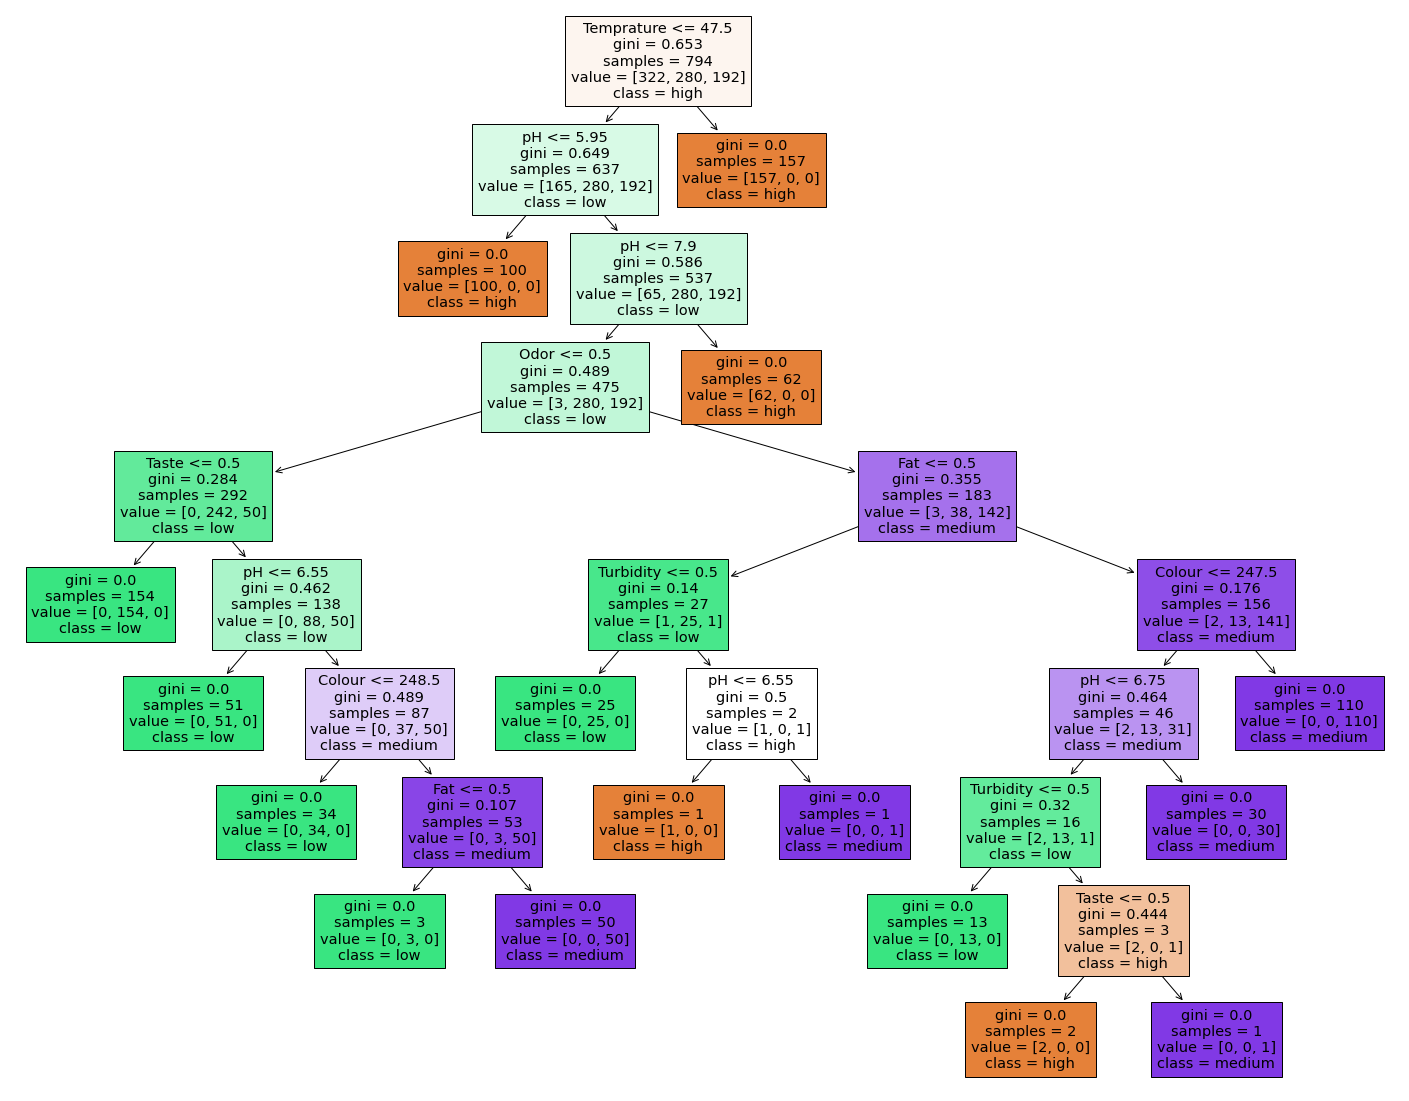

In [16]:
fig = plt.figure(figsize=(25,20))
fn=['pH','Temprature','Taste','Odor','Fat','Turbidity','Colour']
cn=['high','low','medium']
tree.plot_tree(dc,filled=True,feature_names=fn,class_names=cn)

## K-nearest neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [31]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56,stratify=y)
train_x.head(10)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
835,4.7,38,1,0,1,0,255
456,6.8,45,1,1,1,0,245
538,6.8,40,1,1,1,1,255
936,4.5,60,0,1,1,1,250
69,3.0,40,1,1,1,1,255
888,4.5,38,0,1,1,1,255
1050,6.6,37,1,1,1,1,255
90,6.6,50,0,0,0,1,250
101,8.1,66,1,0,1,1,255
221,6.8,45,0,1,1,1,255


In [32]:
knn=KNN(n_neighbors=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=2)

In [33]:
knn_predict=knn.predict(test_x)
k=f1_score(knn_predict,test_y,average='macro')
print('Test F1 Score:',k)

Test F1 Score: 0.9956116596536543


In [34]:
report_k=classification_report(test_y,knn_predict)
print(report_k)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       0.99      1.00      0.99        94
           2       1.00      0.98      0.99        64

    accuracy                           1.00       265
   macro avg       1.00      0.99      1.00       265
weighted avg       1.00      1.00      1.00       265



## RANDOM FOREST

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56,stratify=y)

In [19]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)

RandomForestClassifier()

In [25]:
rf_predict=rf.predict(test_x)
r=f1_score(rf_predict,test_y,average='macro')
print('Test F1 Score:',r)

Test F1 Score: 1.0


In [26]:
report_r=classification_report(test_y,rf_predict)
print(report_r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        64

    accuracy                           1.00       265
   macro avg       1.00      1.00      1.00       265
weighted avg       1.00      1.00      1.00       265



In [55]:
model_accuracy=pd.DataFrame({'Algorithm':['Decision_Tree','KNN','Random_Forest'],'Accuracy':[d,k,r]})
model_accuracy.sort_values(by='Accuracy',ascending=False)

,Algorithm,Accuracy
0,Decision_Tree,1.000000
2,Random_Forest,1.000000
1,KNN,0.995612


#naive bayer
#svm
#logistic Regression

eda
plots and graphs
confusion matrix